# Practice 10 (Clustering)

## Clustering in Scikit Learn

To import 𝐾-Means clustering in Python:
- from sklearn.cluster import KMeans

Define instance, and fit:
- kmeans = KMeans(K) # K: no. clusters kmeans = kmeans.fit(X)

Calculate total square distance (similar to intra-cluster distance):
- kmeans.inertia_

Predict assignment of samples:
- a = kmeans.predict(X)

Find centroids:
- centroids = kmeans.cluster_centers_

## Clustering Seeds

We are given a data set of measurements of many seeds (wheat): Length, width, area, perimeter, asymmetry coef, compactness, groove length. The seeds are from three types of wheat (Kama, Rosa, and Canadian), but we don’t know this information. We would like to know how many types of seeds there are in the data set.
- Dataset from https://archive.ics.uci.edu/ml/datasets/seeds
- Use clustering to achieve this goal
- Start with using 2 dimensions (after PCA) and visualize the result
- Then use all 7 dimensions (features)

C:\Users\arashjkh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


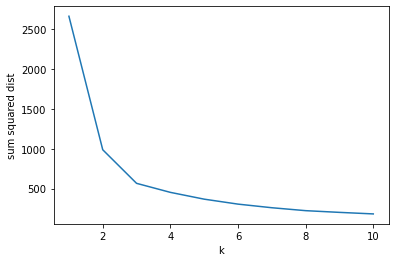

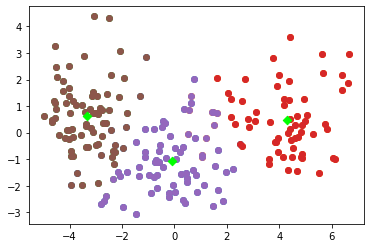

In [1]:
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

# load spectrometer data
df = pd.read_csv('seeds.csv')
data = df.to_numpy()
X = data[:, 0:6]
y = data[:, 7]

U = X - np.mean(X, axis=0)
C = PCA(2)
C.fit(U)
X1_pca = C.transform(U)
##print(X1_pca.shape, y.shape) >>> (210, 2) (210,)
plt.figure(1)
plt.scatter(X1_pca[y==0,0], X1_pca[y==0,1])
plt.scatter(X1_pca[y==1,0], X1_pca[y==1,1])
plt.scatter(X1_pca[y==2,0], X1_pca[y==2,1])

#how many clusters to choose? Generate scree plot
K_max = 10
sum_squared_dist = []
for k in range(1, K_max+1):
    kmeans = KMeans(k)
    kmeans.fit(X1_pca)
    sum_squared_dist.append(kmeans.inertia_)
    
plt.figure(2)
plt.plot(range(1, K_max+1), sum_squared_dist)
plt.xlabel('k')
plt.ylabel('sum squared dist');

# cluster
k = 3
kmeans = KMeans(k)
kmeans = kmeans.fit (X1_pca)
# assign labels as per the clustering
a = kmeans.predict(X1_pca)
centroids = kmeans.cluster_centers_
plt.figure(1);
plt.scatter(X1_pca[a==0,0], X1_pca[a==0,1])
plt.scatter(X1_pca[a==1,0], X1_pca[a==1,1])
plt.scatter(X1_pca[a==2,0], X1_pca[a==2,1])
plt.scatter(centroids[:,0], centroids[:,1], marker='D', c ='lime')

C:\Users\arashjkh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Contingency Matrix = 
[[ 9 60  1]
 [ 0 10 60]
 [68  2  0]]


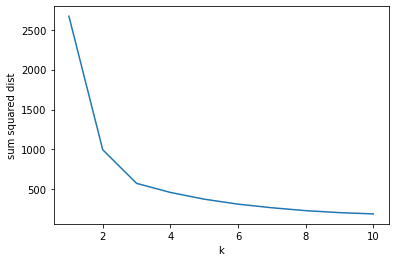

In [2]:
# Now using all features (no PCA)
K_max = 10
sum_squared_dist = []
for k in range(1, K_max+1):
    kmeans = KMeans(k)
    kmeans = kmeans.fit(X)
    sum_squared_dist.append(kmeans.inertia_)

plt.plot(range(1,K_max+1), sum_squared_dist)
plt.xlabel('k')
plt.ylabel('sum squared dist')

from sklearn.metrics.cluster import contingency_matrix

# cluster
k = 3
kmeans = KMeans(k)
kmeans = kmeans.fit(X)
# assign labels as per the clustering
a = kmeans.predict(X)
print(f'Contingency Matrix = \n{contingency_matrix(y,a)}')